In [2]:
import pandas as pd

# Data Load & View

In [3]:
data = pd.read_csv('X_train.csv')
df = pd.DataFrame(data)
df.head(2)

,Unnamed: 0,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,useType,processType,processPattern,processLevel,sentenceCount,sentenceInfo,processSentencenum
0,0,EC_M02_000001,경제,일반,"[오늘의 SR이슈] 윤리 문제 불거진 종근당 회장 조사 마치고 귀가…\""사죄한다\""",NaN,"\""사죄한다.\"" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한...",P1,0,A,99,하,9,"[{'sentenceNo': 1, 'sentenceContent': '\\""사죄한다...",NaN
1,1,EC_M02_000006,경제,은행,한국기업지배구조원 733개 기업 ESG 등급 부여,NaN,"한국기업지배구조원이 8월 31일 국내 상장회사의 환경경영(E), 사회책임경영(S),...",P1,0,A,99,하,13,"[{'sentenceNo': 1, 'sentenceContent': '한국기업지배구...",NaN


In [4]:
df.shape

(586741, 15)

In [5]:
cols = df.columns[1:-1]
cols

Index(['newsID', 'newsCategory', 'newsSubcategory', 'newsTitle',
       'newsSubTitle', 'newsContent', 'partNum', 'useType', 'processType',
       'processPattern', 'processLevel', 'sentenceCount', 'sentenceInfo'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586741 entries, 0 to 586740
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          586741 non-null  int64  
 1   newsID              586741 non-null  object 
 2   newsCategory        586741 non-null  object 
 3   newsSubcategory     584926 non-null  object 
 4   newsTitle           586741 non-null  object 
 5   newsSubTitle        196809 non-null  object 
 6   newsContent         586741 non-null  object 
 7   partNum             586741 non-null  object 
 8   useType             586741 non-null  int64  
 9   processType         586741 non-null  object 
 10  processPattern      586741 non-null  int64  
 11  processLevel        586741 non-null  object 
 12  sentenceCount       586741 non-null  int64  
 13  sentenceInfo        586741 non-null  object 
 14  processSentencenum  295275 non-null  float64
dtypes: float64(1), int64(4), object(10

## describe

In [7]:
df.describe()

,Unnamed: 0,useType,processPattern,sentenceCount,processSentencenum
count,586741.000000,586741.000000,586741.000000,586741.000000,295275.000000
mean,293370.000000,0.495437,38.826953,14.008960,1.219534
std,169377.681485,0.499980,46.305600,7.542275,1.559938
min,0.000000,0.000000,0.000000,6.000000,0.000000
25%,146685.000000,0.000000,0.000000,8.000000,0.000000
50%,293370.000000,0.000000,11.000000,12.000000,1.000000
75%,440055.000000,1.000000,99.000000,17.000000,2.000000
max,586740.000000,1.000000,99.000000,49.000000,14.000000


In [8]:
df.describe(include='object')

,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,processType,processLevel,sentenceInfo
count,586741,586741,584926,586741,196809,586741,586741,586741,586741,586741
unique,586741,7,155,497160,165712,485545,2,2,3,485545
top,EC_M02_000001,사회,정치일반,[새로나온책] 인문·사회 外,코로나19 중앙재난안전대책본부 회의,응답하라 1988 류준열 혜리 응답하라(응팔) 1988 혜리 류준열 피앙세반지 고백...,P2,A,하,"[{'sentenceNo': 1, 'sentenceContent': ""응답하라 19..."
freq,1,116223,40867,43,71,43,295275,506526,536628,43


## newsContent 중복 제거

In [47]:
# df[df['newsContent']!=]
df_count = df['newsContent'].value_counts().reset_index()
df_duplicate = df_count[df_count['count']!=1].copy()
df_duplicate.head(2)

,newsContent,count
0,응답하라 1988 류준열 혜리 응답하라(응팔) 1988 혜리 류준열 피앙세반지 고백...,43
1,SNL 이태임 예원 'SNL코리아6'에 출연한 배우 이태임이 화끈한 셀프 디스로 주...,40


In [48]:
# 제거할 rows 개수.
sum(df_duplicate['count'])

189892

In [49]:
drop_rows = df_duplicate['newsContent'].tolist()
len(drop_rows)

88696

In [54]:
new_df = df[~df['newsContent'].isin(drop_rows)].copy()
new_df.shape

(396849, 15)

In [55]:
new_df.describe(include='object')

,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,processType,processLevel,sentenceInfo
count,396849,396849,395640,396849,136480,396849,396849,396849,396849,396849
unique,396849,7,153,396206,135614,396849,2,2,3,396849
top,EC_M02_000001,사회,정치일반,[새로나온책] 인문·사회 外,홍석환 HR전략 컨설팅 대표,"\""사죄한다.\"" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한...",P2,A,하,"[{'sentenceNo': 1, 'sentenceContent': '\\""사죄한다..."
freq,1,81574,31444,25,63,1,199452,318821,348258,1


## newsTitle 중복 제거

In [56]:
new_df['newsTitle'].nunique()

396206

In [ ]:
df_count = new_df['newsTitle'].value_counts().reset_index()
df_duplicate = df_count[df_count['count']!=1]
sum(df_duplicate['count'])

1200

In [66]:
drop_rows = df_duplicate['newsTitle'].tolist()
len(drop_rows)

557

In [67]:
df_new = new_df[~new_df['newsTitle'].isin(drop_rows)].copy()
df_new.shape

(395649, 15)

In [ ]:
396849 - 395649 # 잘 제거됨.

1200

In [72]:
df_new[cols].describe()

,useType,processPattern,sentenceCount
count,395649.000000,395649.000000,395649.000000
mean,0.284972,54.772430,14.157569
std,0.451402,46.327058,7.638933
min,0.000000,0.000000,6.000000
25%,0.000000,0.000000,8.000000
50%,0.000000,99.000000,12.000000
75%,1.000000,99.000000,18.000000
max,1.000000,99.000000,49.000000


In [70]:
df_new.describe(include='object')

,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,processType,processLevel,sentenceInfo
count,395649,395649,394441,395649,136226,395649,395649,395649,395649,395649
unique,395649,7,153,395649,135403,395649,2,2,3,395649
top,EC_M02_000001,사회,정치일반,"[오늘의 SR이슈] 윤리 문제 불거진 종근당 회장 조사 마치고 귀가…\""사죄한다\""",홍석환 HR전략 컨설팅 대표,"\""사죄한다.\"" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한...",P2,A,하,"[{'sentenceNo': 1, 'sentenceContent': '\\""사죄한다..."
freq,1,81418,31407,1,61,1,198842,317801,347173,1


In [74]:
df = df_new.copy()
df.shape

(395649, 15)

## null 가진 columns

In [76]:
has_null_cols = []
for col in cols:
    if df[col].count() != len(df) : has_null_cols.append(col)

has_null_cols

['newsSubcategory', 'newsSubTitle']

In [77]:
for col in has_null_cols:
    print(f'{col} => {sum(df[col].isnull())}')

newsSubcategory => 1208
newsSubTitle => 259423


In [11]:
len(df) - 389932

196809

## columns의 특정 값과 개수

In [ ]:
df['useType'].value_counts()

useType
0    282900
1    112749
Name: count, dtype: int64

In [79]:
df['processType'].unique() # 처리유형 (D <- 직접생성)

array(['A', 'D'], dtype=object)

In [80]:
df['processPattern'].unique() # 처리패턴 (22 <- 부동산 판매정보 노출 광고형)

array([99, 16, 14, 11, 15, 13, 12,  0, 23, 24, 22, 21], dtype=int64)

In [81]:
# 처리(가공)문장수
print(sum(df['processSentencenum'].isnull()) / len(df) *100)
print(df['processSentencenum'].unique())

49.74282760729839
[nan  4.  1.  3.  2.  7.  6.  5.  8. 10. 12.  9. 11. 14. 13.  0.]


## real data 조정

In [188]:
fake = df[df['useType']==0]
real = df[df['useType']==1]
fake.shape, real.shape

((282900, 15), (112749, 15))

In [189]:
cols

Index(['newsID', 'newsCategory', 'newsSubcategory', 'newsTitle',
       'newsSubTitle', 'newsContent', 'partNum', 'useType', 'processType',
       'processPattern', 'processLevel', 'sentenceCount', 'sentenceInfo'],
      dtype='object')

In [190]:
real['newsCategory'].value_counts()

newsCategory
사회       22433
세계       17020
경제       16548
정치       16213
IT&과학    15761
생활&문화    13657
연예       11117
Name: count, dtype: int64

In [191]:
cate_cols = df['newsCategory'].unique().tolist()
cate_cols

['경제', '연예', '세계', 'IT&과학', '생활&문화', '정치', '사회']

In [192]:
new_fake = fake[:112749]
new_fake.head(2)

,Unnamed: 0,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,useType,processType,processPattern,processLevel,sentenceCount,sentenceInfo,processSentencenum
0,0,EC_M02_000001,경제,일반,"[오늘의 SR이슈] 윤리 문제 불거진 종근당 회장 조사 마치고 귀가…\""사죄한다\""",NaN,"\""사죄한다.\"" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한...",P1,0,A,99,하,9,"[{'sentenceNo': 1, 'sentenceContent': '\\""사죄한다...",NaN
1,1,EC_M02_000006,경제,은행,한국기업지배구조원 733개 기업 ESG 등급 부여,NaN,"한국기업지배구조원이 8월 31일 국내 상장회사의 환경경영(E), 사회책임경영(S),...",P1,0,A,99,하,13,"[{'sentenceNo': 1, 'sentenceContent': '한국기업지배구...",NaN


In [194]:
new_fake['newsCategory'].value_counts()

newsCategory
사회       21811
경제       21311
세계       16257
연예       14939
IT&과학    14698
정치       14572
생활&문화     9161
Name: count, dtype: int64

In [195]:
real.shape, new_fake.shape

((112749, 15), (112749, 15))

## 시각화

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette('pastel')

import koreanize_matplotlib
# plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [83]:
cols

Index(['newsID', 'newsCategory', 'newsSubcategory', 'newsTitle',
       'newsSubTitle', 'newsContent', 'partNum', 'useType', 'processType',
       'processPattern', 'processLevel', 'sentenceCount', 'sentenceInfo'],
      dtype='object')

array([[<Axes: title={'center': 'useType'}>,
        <Axes: title={'center': 'processPattern'}>],
       [<Axes: title={'center': 'sentenceCount'}>, <Axes: >]],
      dtype=object)

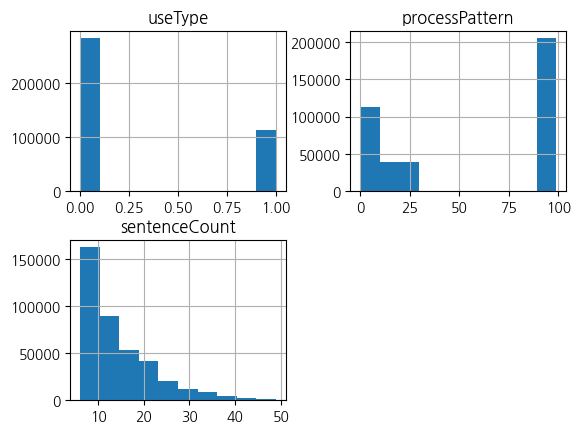

In [84]:
df[cols].hist()

<Axes: xlabel='useType', ylabel='count'>

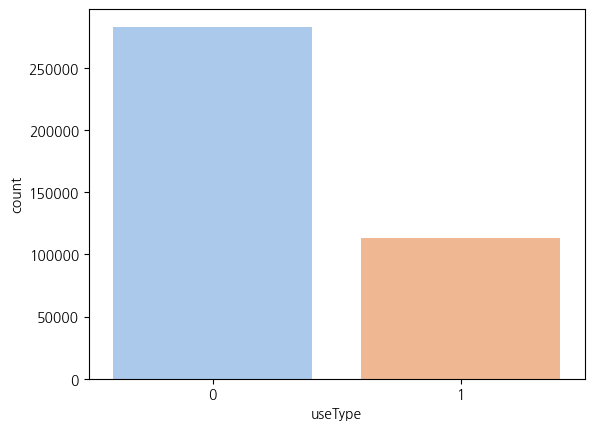

In [85]:
sns.countplot(data=df[cols], x='useType',palette=color)

<Axes: xlabel='newsCategory', ylabel='count'>

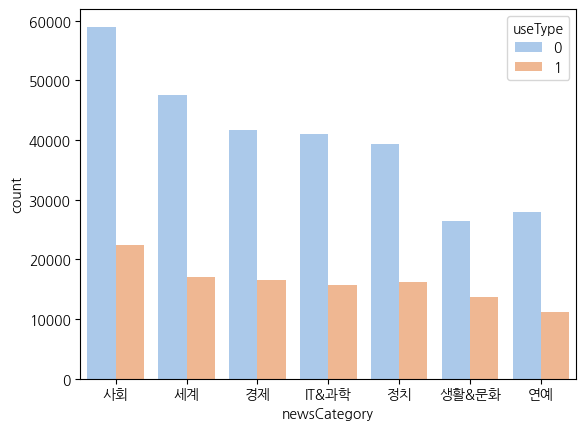

In [94]:
sns.countplot(data=df[cols], x='newsCategory', hue='useType',
              order=df['newsCategory'].value_counts().index, palette=color)

In [196]:
dfconcat = pd.concat([new_fake, real], axis=0)
dfconcat.shape

(225498, 15)

In [197]:
len(new_fake), len(real)

(112749, 112749)

<Axes: xlabel='newsCategory', ylabel='count'>

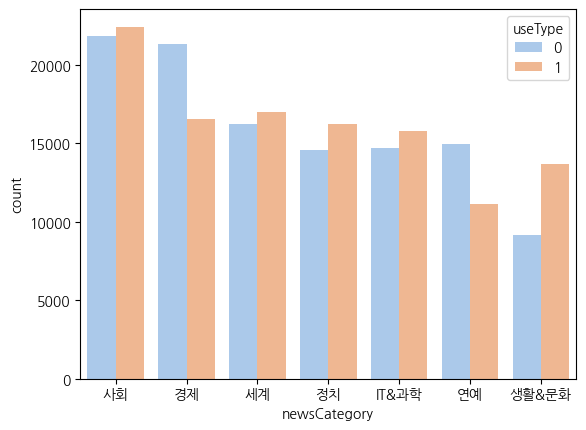

In [198]:
sns.countplot(data=dfconcat[cols], x='newsCategory', hue='useType',
              order=dfconcat['newsCategory'].value_counts().index, palette=color)

# Data Store

In [135]:
dfconcat.to_csv("train.csv")

In [137]:
train_data = pd.read_csv("train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225498 entries, 0 to 225497
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0.1        225498 non-null  int64  
 1   Unnamed: 0          225498 non-null  int64  
 2   newsID              225498 non-null  object 
 3   newsCategory        225498 non-null  object 
 4   newsSubcategory     224693 non-null  object 
 5   newsTitle           225498 non-null  object 
 6   newsSubTitle        87690 non-null   object 
 7   newsContent         225498 non-null  object 
 8   partNum             225498 non-null  object 
 9   useType             225498 non-null  int64  
 10  processType         225498 non-null  object 
 11  processPattern      225498 non-null  int64  
 12  processLevel        225498 non-null  object 
 13  sentenceCount       225498 non-null  int64  
 14  sentenceInfo        225498 non-null  object 
 15  processSentencenum  56357 non-null

In [ ]:
train_data.describe(include='object')

,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,processType,processLevel,sentenceInfo
count,225498,225498,224693,225498,87690,225498,225498,225498,225498,225498
unique,225498,7,152,225498,87288,225498,2,2,3,225498
top,EC_M02_000001,사회,정치일반,"[오늘의 SR이슈] 윤리 문제 불거진 종근당 회장 조사 마치고 귀가…\""사죄한다\""",코로나19 중앙재난안전대책본부 회의,"\""사죄한다.\"" 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한...",P1,A,하,"[{'sentenceNo': 1, 'sentenceContent': '\\""사죄한다..."
freq,1,44244,14578,1,27,1,169141,214123,222756,1


# Validation Data

In [200]:
validation = pd.read_csv("validation.csv")
validation.head(2)

,Unnamed: 0,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,useType,processType,processPattern,processLevel,sentenceCount,sentenceInfo,processSentencenum
0,0,EC_M02_000005,경제,은행,"최종구 금융위원장, 임팩트금융 정착 위해 정부 차원 기금 조성",NaN,"최종구 금융위원회 위원장이 \""'임팩트금융(사회적금융)'의 안착 차원에서 정부가 직...",P1,0,A,99,하,13,"[{'sentenceNo': 1, 'sentenceContent': '최종구 금융위...",NaN
1,1,EC_M02_000007,경제,산업,가을 맞아 더 활발한 기업 프로보노 활동,NaN,요즘 프로보노 형 사회 공헌 활동을 펴는 회사가 늘고 있다.\n회사를 경영하거나 기...,P1,0,A,99,하,13,"[{'sentenceNo': 1, 'sentenceContent': '요즘 프로보노...",NaN


## describe

In [201]:
validation.shape

(73344, 15)

In [205]:
validation['useType'].value_counts()

useType
0    37006
1    36338
Name: count, dtype: int64

In [228]:
validation.describe()

,Unnamed: 0,useType,processPattern,sentenceCount,processSentencenum
count,73344.000000,73344.000000,73344.000000,73344.000000,36910.000000
mean,36671.500000,0.495446,38.830511,13.975117,1.223842
std,21172.733409,0.499983,46.303639,7.502784,1.565694
min,0.000000,0.000000,0.000000,6.000000,0.000000
25%,18335.750000,0.000000,0.000000,8.000000,0.000000
50%,36671.500000,0.000000,11.000000,12.000000,1.000000
75%,55007.250000,1.000000,99.000000,17.000000,2.000000
max,73343.000000,1.000000,99.000000,49.000000,13.000000


In [202]:
validation.describe(include='object')

,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,processType,processLevel,sentenceInfo
count,73344,73344,73128,73344,24529,73344,73344,73344,73344,73344
unique,73344,7,147,71937,23987,71178,2,2,3,71178
top,EC_M02_000005,사회,정치일반,[새로나온책] 인문·사회 外,코로나19 중앙재난안전대책본부 회의,못먹는 감 산이와 매드클라운이 더블 싱글 앨범 '못먹는 감'을 18일 자정에 공개했...,P2,A,하,"[{'sentenceNo': 1, 'sentenceContent': ""못먹는 감 산..."
freq,1,14529,5138,3,8,8,36910,63317,67034,8


## 제목 내용 중복에서 다른 feature 찾기

In [207]:
a = validation[['newsTitle','newsContent']].value_counts().reset_index()
new_val1 = a[a['count']!=1]
new_val1.shape

(1381, 3)

In [208]:
b = validation[['newsTitle','newsSubTitle','newsContent']].value_counts().reset_index()
new_val2 = b[b['count']!=1]
new_val2.shape

(462, 4)

In [209]:
new_val1.head(2)

,newsTitle,newsContent,count
0,"진짜사나이 이이경 \""제작진에게 사과 받아…정말 괜찮아요\"" 무슨일?","진짜사나이 이이경 \""제작진에게 사과 받아…정말 괜찮아요\"" 진짜사나이 이이경 진짜...",3
1,"박기영, 변호사 남편과 결혼 5년 만에 파경 '6번의 이별 극복했지만…'","박기영, 변호사 전남편과 결혼 5년만에 파경 \""오랜시간 불화로…\"" 가수 박기영의...",3


In [210]:
validation[validation['newsTitle'].str.startswith("박기영, 변호사 남편과 결혼 5년 만에 파경 ")]
# => partNum이 다름. 내용, 제목 중복 제거 필요.

,Unnamed: 0,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,useType,processType,processPattern,processLevel,sentenceCount,sentenceInfo,processSentencenum
21110,21110,ET_M03_279535,연예,연예가화제,"박기영, 변호사 남편과 결혼 5년 만에 파경 '6번의 이별 극복했지만…'",NaN,"박기영, 변호사 전남편과 결혼 5년만에 파경 \""오랜시간 불화로…\"" 가수 박기영의...",P1,1,A,0,하,10,"[{'sentenceNo': 1, 'sentenceContent': '박기영, 변호...",NaN
21114,21114,ET_M03_279553,연예,연예가화제,"박기영, 변호사 남편과 결혼 5년 만에 파경 '6번의 이별 극복했지만…'",NaN,"박기영, 변호사 전남편과 결혼 5년만에 파경 \""오랜시간 불화로…\"" 가수 박기영의...",P1,1,A,0,하,10,"[{'sentenceNo': 1, 'sentenceContent': '박기영, 변호...",NaN
58020,58020,ET_M03_739491,연예,연예가화제,"박기영, 변호사 남편과 결혼 5년 만에 파경 '6번의 이별 극복했지만…'",NaN,"박기영, 변호사 전남편과 결혼 5년만에 파경 \""오랜시간 불화로…\"" 가수 박기영의...",P2,1,A,0,하,10,"[{'sentenceNo': 1, 'sentenceContent': '박기영, 변호...",0.0
58021,58021,ET_M03_739500,연예,연예가화제,"박기영, 변호사 남편과 결혼 5년 만에 파경 \""결혼전 시아버지 반대 있었다\""",NaN,"박기영, 변호사 전남편과 결혼 5년만에 파경 \""오랜시간 불화로…\"" 가수 박기영의...",P2,1,A,0,하,10,"[{'sentenceNo': 1, 'sentenceContent': '박기영, 변호...",0.0


## newsContent 중복 제거

In [215]:
df_count = validation['newsContent'].value_counts().reset_index()
df_duplicate = df_count[df_count['count']!=1].copy()

new_val = validation[~validation['newsContent'].isin(df_duplicate['newsContent'].tolist())].copy()
new_val.shape

(69321, 15)

In [219]:
print(len(df_duplicate), sum(df_duplicate['count']))
73344 - 4023

1857 4023


69321

In [220]:
new_val.describe(include="object")

,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,processType,processLevel,sentenceInfo
count,69321,69321,69111,69321,23586,69321,69321,69321,69321,69321
unique,69321,7,147,69300,23511,69321,2,2,3,69321
top,EC_M02_000005,사회,정치일반,[새로나온책] 인문·사회 外,코로나19 중앙재난안전대책본부 회의,"최종구 금융위원회 위원장이 \""'임팩트금융(사회적금융)'의 안착 차원에서 정부가 직...",P2,A,하,"[{'sentenceNo': 1, 'sentenceContent': '최종구 금융위..."
freq,1,14028,5000,3,8,1,34882,59401,63078,1


## newsTitle 중복 제거

In [221]:
df_count = new_val['newsTitle'].value_counts().reset_index()
df_duplicate = df_count[df_count['count']!=1].copy()

new_val = new_val[~new_val['newsTitle'].isin(df_duplicate['newsTitle'].tolist())].copy()
new_val.shape

(69280, 15)

In [224]:
print(len(df_duplicate), sum(df_duplicate['count']))
69321 - 41

20 41


69280

In [225]:
new_val.describe(include="object")

,newsID,newsCategory,newsSubcategory,newsTitle,newsSubTitle,newsContent,partNum,processType,processLevel,sentenceInfo
count,69280,69280,69070,69280,23577,69280,69280,69280,69280,69280
unique,69280,7,147,69280,23505,69280,2,2,3,69280
top,EC_M02_000005,사회,정치일반,"최종구 금융위원장, 임팩트금융 정착 위해 정부 차원 기금 조성",코로나19 중앙재난안전대책본부 회의,"최종구 금융위원회 위원장이 \""'임팩트금융(사회적금융)'의 안착 차원에서 정부가 직...",P2,A,하,"[{'sentenceNo': 1, 'sentenceContent': '최종구 금융위..."
freq,1,14027,5000,1,8,1,34862,59365,63041,1


## 시각화

useType (Original Validation Data)

0  =>  37006

1  =>  36338

In [226]:
new_val['useType'].value_counts()

useType
0    36289
1    32991
Name: count, dtype: int64

<Axes: xlabel='useType', ylabel='count'>

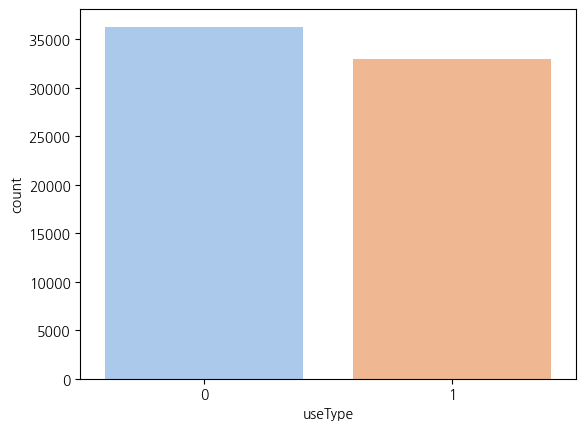

In [230]:
sns.countplot(data=new_val, x='useType', palette=color)

<Axes: xlabel='newsCategory', ylabel='count'>

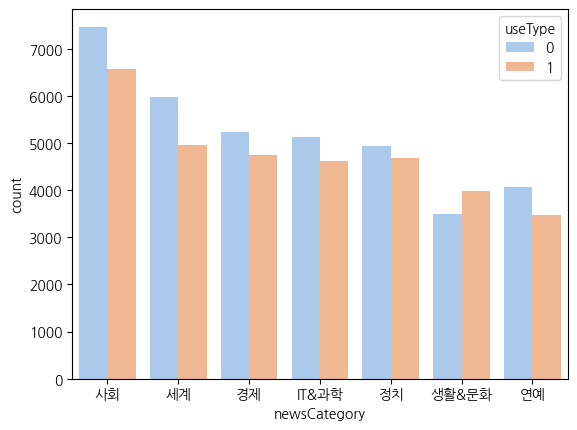

In [233]:
sns.countplot(data=new_val, x='newsCategory', hue='useType',
              order=df['newsCategory'].value_counts().index, palette=color)